In [1]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

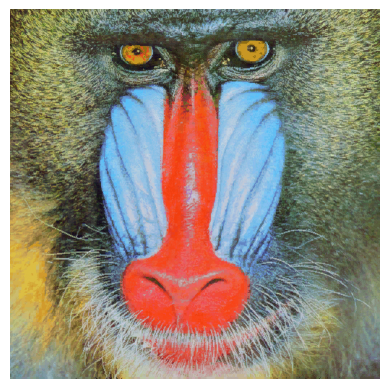

In [2]:
# Lee imagen de archivo
img = cv2.imread('mandril.jpg')

if img is not None:
    # Convierte la imagen a RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Muestra la imagen tras convertir a RGB
    # Se eliminan etiquetas de los ejes
    plt.figure()
    plt.axis("off")
    plt.imshow(img_rgb) 
    plt.show()
else:
    print("Imagen no encontrada")

(512, 512)


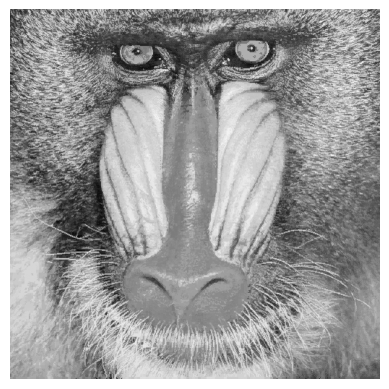

In [3]:
#Conversión de la imagen a niveles de grises de la imagen original en BGR
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gris.shape)
#Muestra, indicando el mapa de color de grises con matplotlib
plt.figure()
#Eliminamos etiquetas de los ejes
plt.axis("off")
plt.imshow(gris, cmap='gray') 
plt.show()

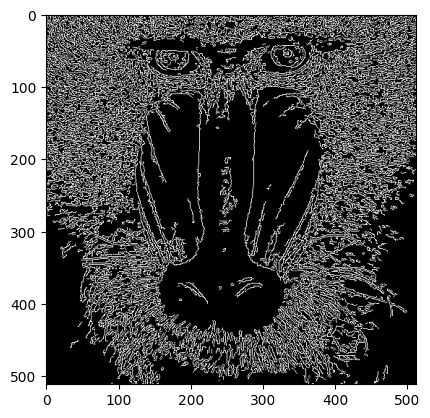

In [4]:
#Obtiene contornos con el operador de Canny
canny = cv2.Canny(gris, 100, 200)
#print(canny) #Muestra contenido, valores 0 o 255
#Visualiza resultado
plt.imshow(canny, cmap='gray') 
plt.show()

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el máximo para filas y columnas (uno para cada) y muestra el número de filas con un número de píxeles blancos mayor o igual que 0.95*máximo.

El valor máximo por columnas es: 0.365234375
El valor máximo por filas es: 0.4296875
El número de filas que son mayores que 0.95 * máximo (0.408203125) es: 2


(0.0, 512.0)

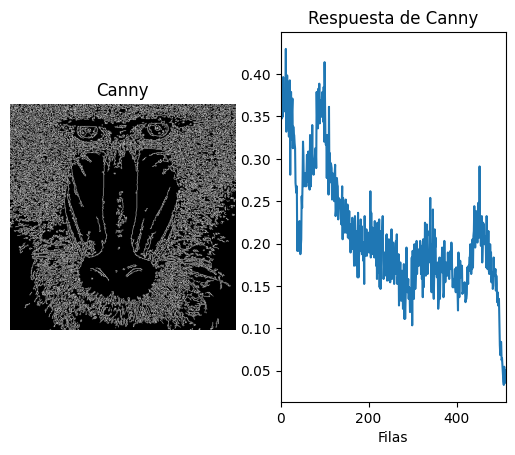

In [5]:
# Suma los valores de los pixeles por fila
row_counts = cv2.reduce(canny, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
# Normaliza en base al número de columnas y al valor máximo del píxel (255)
rows = row_counts[:,0] / (255 * canny.shape[0])

# Suma los valores de los pixeles por columna
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
# Normaliza en base al número de filas y al valor máximo del píxel (255)
cols = col_counts[0] / (255 * canny.shape[1])

# Obtiene el valor máximo para las columnas
max_cols = np.max(cols, 0)
print("El valor máximo por columnas es:", max_cols)

# Obtiene el valor máximo para las filas
max_rows = np.max(rows, 0)
print("El valor máximo por filas es:", max_rows)

# Obtiene el número de filas con un número de píxeles blancos mayor o igual que 0.95 * máximo
filas_mayor_95 = 0
for row in rows:
    if row >= (0.95 * max_rows):
        filas_mayor_95 += 1

print(f"El número de filas que son mayores que 0.95 * máximo ({0.95 * max_rows}) es: {filas_mayor_95}")

# Muestra la imagen
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray')

# Muestra dicha cuenta gráficamente
plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
#Rango en x definido por las columnas
plt.xlim([0, canny.shape[1]])

TAREA: Aplica umbralizado a la imagen resultante de Sobel (valores 0 a 255 y convertida a 8 bits por ejemplo sobel8 = np.uint8(sobel)), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny. Calcula los máximos por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

El valor máximo por columnas es: 0.654296875
El valor máximo por filas es: 0.56640625
El número de filas que son mayores que 0.95 * máximo (0.5380859375) es: 6
El número de columnas que son mayores que 0.95 * máximo (0.62158203125) es: 4


(0.0, 512.0)

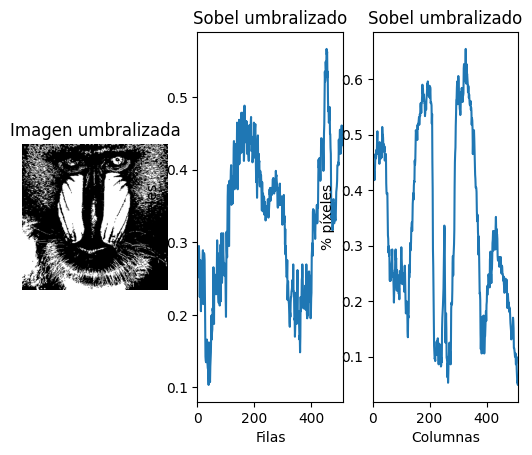

In [6]:
# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

# Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
# Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

# Se convierte la imagen a 8 bits
sobel8 = np.uint8(sobel)

# Define valor umbral
valor_umbral = 150
# Obtiene imagen umbralizada para dicho valor definido
res, imagen_umbralizada = cv2.threshold(gris, valor_umbral, 255, cv2.THRESH_BINARY)

# Suma los valores de los pixeles por fila
row_counts = cv2.reduce(imagen_umbralizada, 1, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
# Normaliza en base al número de columnas y al valor máximo del píxel (255)
rows = row_counts[:,0] / (255 * imagen_umbralizada.shape[0])

# Suma los valores de los pixeles por columna
col_counts = cv2.reduce(imagen_umbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
# Normaliza en base al número de filas y al valor máximo del píxel (255)
cols = col_counts[0] / (255 * imagen_umbralizada.shape[1])

# Obtiene el valor máximo para las columnas
max_cols = np.max(cols, 0)
print("El valor máximo por columnas es:", max_cols)

# Obtiene el valor máximo para las filas
max_rows = np.max(rows, 0)
print("El valor máximo por filas es:", max_rows)

# Obtiene el número de filas con un número de píxeles blancos mayor o igual que 0.95 * máximo
filas_mayor_95 = 0
for row in rows:
    if row >= (0.95 * max_rows):
        filas_mayor_95 += 1

print(f"El número de filas que son mayores que 0.95 * máximo ({0.95 * max_rows}) es: {filas_mayor_95}")

# Obtiene el número de columnas con un número de píxeles blancos mayor o igual que 0.95 * máximo
columnas_mayor_95 = 0
for col in cols:
    if col >= (0.95 * max_cols):
        columnas_mayor_95 += 1

print(f"El número de columnas que son mayores que 0.95 * máximo ({0.95 * max_cols}) es: {columnas_mayor_95}")

# Muestra la imagen original
plt.figure()
plt.subplot(1, 3, 1)
plt.title("Imagen umbralizada")
plt.axis("off")
plt.imshow(imagen_umbralizada, cmap='gray')

# Muestra los datos de las filas
plt.subplot(1, 3, 2)
plt.title("Sobel umbralizado")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(rows)
plt.xlim([0, imagen_umbralizada.shape[1]])

# Muestra los datos de las columnas
plt.subplot(1, 3, 3)
plt.title("Sobel umbralizado")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)
plt.xlim([0, imagen_umbralizada.shape[0]])


TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.


In [7]:
# Función que busca el pixel más claro y más óscuro de una imagen
def buscar_minimo_maximo(imagen):
    # Dimensiones de la imagen
    ancho, altura, n_canales = imagen.shape

    pixel_minimo = (0, 0)
    valor_pixel_minimo = 255 * 3

    pixel_maximo = (0, 0)
    valor_pixel_maximo = 0
    
    for i in range(altura):
        for j in range(ancho):
            # Se obtiene el valor del pixel (i, j) en los tres canales de la imagen
            valor_pixel_actual = int(imagen[j, i, 0]) + int(imagen[j, i, 1]) + int(imagen[j, i, 2])

            # Se compara el valor obtenido para determinar si se trata de un mínimo y un máximo
            if (valor_pixel_actual < valor_pixel_minimo):
                pixel_minimo = (i, j)
                valor_pixel_minimo = valor_pixel_actual
            if(valor_pixel_actual > valor_pixel_maximo):
                pixel_maximo = (i, j)
                valor_pixel_maximo = valor_pixel_actual
    
    # Se devuelve el par de píxel de menor y mayor valor
    return [pixel_minimo, pixel_maximo]

In [8]:
vid = cv2.VideoCapture(0)
modo = 0
titulos = ["Normal", "Deteccion de bordes con Sobel (sin umbralizar)", "Deteccion de bordes con Sobel (umbralizado)" , "Deteccion de bordes con Canny", "Pixeles maximo y mininmo"]
# Tipografía para mostrar texto
font = cv2.FONT_HERSHEY_SIMPLEX
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()
    h, w, c = frame.shape
  
    # Hay nuevo fotograma
    if ret:
        # Sobel
        if modo == 1 or modo == 2:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            # Gaussiana para suavizar la imagen original, eliminando altas frecuencias
            frame = cv2.GaussianBlur(frame, (3, 3), 0)

            # Calcula en ambas direcciones (horizontal y vertical)
            sobelx = cv2.Sobel(frame, cv2.CV_64F, 1, 0)  # x
            sobely = cv2.Sobel(frame, cv2.CV_64F, 0, 1)  # y
            # Combina ambos resultados
            frame = cv2.add(sobelx, sobely)

            # Se convierte la imagen a 8 bits
            frame = np.uint8(frame)

            # Umbralización de la imagen
            if modo == 2:
                # Define valor umbral
                valor_umbral = 150
                # Obtiene imagen umbralizada para dicho valor definido
                res, frame = cv2.threshold(frame, valor_umbral, 255, cv2.THRESH_BINARY)
        # Canny
        elif modo == 3:
            frame = cv2.Canny(frame, 100, 200)
        elif modo == 4:
            # Se busca el píxel más claro y más oscuro de la imagen
            pixel_minimo, pixel_maximo = buscar_minimo_maximo(frame)
            # Se dibuja un circulo en el pixel de menor valor de la imagen
            cv2.circle(frame, pixel_minimo, 10, (255, 255, 255), -1)
            # Se dibuja un circulo en el pixel de mayor valor de la imagen
            cv2.circle(frame, pixel_maximo, 10, (0, 0, 0), -1)

        cv2.rectangle(frame, (0, h), (w, h - 20), (255, 255, 255), -1)
        cv2.putText(frame, titulos[modo], (0, h - 5), font, 0.5, (0, 0, 0), 2)
        cv2.imshow("Demo", frame)
    
    # Detenemos pulsado ESC
    tecla_pulsada = cv2.waitKey(20)
    if tecla_pulsada > -1:
        if tecla_pulsada == 13:
            if modo == 4:
                modo = 0
            else:
                modo += 1
        if tecla_pulsada == 27:
            break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()